In [2]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
import calendar
import time
plt.style.use('ggplot')
start_time = dt.datetime.now()
%matplotlib inline

In [3]:
%%time
data=pd.read_csv('applications data.csv')
data.shape

CPU times: user 604 ms, sys: 57.1 ms, total: 661 ms
Wall time: 686 ms


(1000000, 10)

In [4]:
data.head()

,record,date,ssn,firstname,lastname,address,zip5,dob,homephone,fraud_label
0,1,20170101,379070012,XRRAMMTR,SMJETJMJ,6861 EUTST PL,2765,19070626,1797504115,0
1,2,20170101,387482503,MAMSTUJR,RTTEMRRR,7280 URASA PL,57169,19340615,4164239415,1
2,3,20170101,200332444,SZMMUJEZS,EUSEZRAE,5581 RSREX LN,56721,19070626,216537580,0
3,4,20170101,747451317,SJJZSXRSZ,ETJXTXXS,1387 UJZXJ RD,35286,19440430,132144161,0
4,5,20170101,24065868,SSSXUEJMS,SSUUJXUZ,279 EAASA WY,3173,19980315,6101082272,0


In [6]:
data.columns

Index(['record', 'date', 'ssn', 'firstname', 'lastname', 'address', 'zip5',
       'dob', 'homephone', 'fraud_label'],
      dtype='object')

In [4]:
data.describe(include='all')

,record,date,ssn,firstname,lastname,address,zip5,dob,homephone,fraud_label
count,1000000.000000,1.000000e+06,1.000000e+06,1000000,1000000,1000000,1000000.000000,1.000000e+06,1.000000e+06,1000000.000000
unique,NaN,NaN,NaN,78136,177001,828774,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,EAMSTRMT,ERJSAXA,123 MAIN ST,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,12658,8580,1079,NaN,NaN,NaN,NaN
mean,500000.500000,2.017067e+07,5.083415e+08,NaN,NaN,NaN,50073.333143,1.951725e+07,5.368716e+09,0.014393
std,288675.278932,3.449869e+02,2.934864e+08,NaN,NaN,NaN,28915.921546,3.568872e+05,3.082161e+09,0.119104
min,1.000000,2.017010e+07,3.600000e+01,NaN,NaN,NaN,2.000000,1.900010e+07,5.937990e+05,0.000000
25%,250000.750000,2.017040e+07,2.542176e+08,NaN,NaN,NaN,24992.000000,1.916092e+07,2.677134e+09,0.000000
50%,500000.500000,2.017070e+07,5.088144e+08,NaN,NaN,NaN,50492.000000,1.950090e+07,5.399910e+09,0.000000
75%,750000.250000,2.017100e+07,7.630924e+08,NaN,NaN,NaN,74496.000000,1.983032e+07,8.109241e+09,0.000000


### Make best guess to automatically set numerics or categoricals

In [5]:
# add a dummy categorical column for the case the fields all look numeric
data['dummy'] = 'temp'

df = data.describe(include='all')
frac_unique = df.loc['unique']/ df.loc['count']
s1 = frac_unique.isna()
s2 = np.where(s1)[0]
s3 = np.where(s1 == False)[0]
numerics = data.columns[s2].tolist()
categoricals = data.columns[s3].tolist()

for col in data.columns:
    numunique = data[col].nunique()
    if numunique == len(data) or numunique <=6: # you can adjust this upper limit for your data set
            print(col)
            if col in numerics:
                numerics.remove(col)
                categoricals.extend([col])

# manually switch fields some if desired.          
switch_num2cat = ['ssn','zip5','homephone']
switch_cat2num = []
numerics = [s for s in numerics if s not in switch_num2cat]
categoricals = [s for s in categoricals if s not in switch_cat2num]
numerics.extend(switch_cat2num)
categoricals.extend(switch_num2cat)
categoricals.remove('dummy')
            
print('numerics:',numerics)     
print('\ncategoricals:',categoricals)  

record
fraud_label
dummy
numerics: ['date', 'dob']

categoricals: ['firstname', 'lastname', 'address', 'record', 'fraud_label', 'ssn', 'zip5', 'homephone']


In [6]:
def count_zeros(data):
    count = 0
    for i in data:
        if i == 0:
            count += 1
    return count

In [7]:
statistics_of_data1 = []
for col in numerics:
    num_zeros = count_zeros(data[col])
    percent_zeros = num_zeros / data.shape[0] * 100
    statistics_of_data1.append((col,
                             'numeric',
                             data[col].notnull().sum(),
                             f'{data[col].notnull().sum()/data.shape[0]*100:.1f}%',
#                              f'{percent_zeros:.2f}%',  # convert to percentage with 2 decimal places
                             count_zeros(data[col]),
                             round(data[col].min(), 2),
                             round(data[col].max(), 2),
                             data[col].mean(),
                             round(np.std(data[col]), 2),
                             data[col].mode()[0]
                             ))

stats_dfnum = pd.DataFrame(statistics_of_data1, columns = ['Field Name', 'Field Type','# Records Have Values', '% Populated', '# Zeros', 'Min', 'Max', 'Mean', 'Standard Deviation', 'Most Common'])
stats_dfnum.to_excel('numerics table.xlsx', index=False)
stats_dfnum

,Field Name,Field Type,# Records Have Values,% Populated,# Zeros,Min,Max,Mean,Standard Deviation,Most Common
0,date,numeric,1000000,100.0%,0,20170101,20171231,2.017067e+07,344.99,20170816
1,dob,numeric,1000000,100.0%,0,19000101,20161031,1.951725e+07,356887.02,19070626


In [8]:
statistics_of_data = []
for col in categoricals:
    statistics_of_data.append((col,
                             'categorical',
                             data[col].notnull().sum(),
                             f'{data[col].notnull().sum()/data.shape[0]*100:.1f}%',
                             count_zeros(data[col]),
                             data[col].nunique(),
                             data[col].mode()[0]
                            
                             ))
stats_dfcat = pd.DataFrame(statistics_of_data, columns = ['Field Name', 'Field Type','# Records Have Values', '% Populated', '# Zeros','# Unique Values', 'Most Common',])
stats_dfcat.to_excel('categoricals table.xlsx',index=False)
stats_dfcat

,Field Name,Field Type,# Records Have Values,% Populated,# Zeros,# Unique Values,Most Common
0,firstname,categorical,1000000,100.0%,0,78136,EAMSTRMT
1,lastname,categorical,1000000,100.0%,0,177001,ERJSAXA
2,address,categorical,1000000,100.0%,0,828774,123 MAIN ST
3,record,categorical,1000000,100.0%,0,1000000,1
4,fraud_label,categorical,1000000,100.0%,985607,2,0
5,ssn,categorical,1000000,100.0%,0,835819,999999999
6,zip5,categorical,1000000,100.0%,0,26370,68138
7,homephone,categorical,1000000,100.0%,0,28244,9999999999


# Data Preparation

In [9]:
#Convert Date
data['date']=pd.to_datetime(data.date.astype(str).apply(lambda x: x[:4]+'-'+x[4:6]+'-'+x[6:]))
data['dob_dt']=pd.to_datetime(data.dob.astype(str).apply(lambda x: x[:4]+'-'+x[4:6]+'-'+x[6:]))
#right alignment 
data['zip5']=data['zip5'].apply(lambda x:'{0:0>5}'.format(x))
#Fix frivolous Values
data.loc[data['address']=='123 MAIN ST','address']=data.loc[data['address']=='123 MAIN ST','record']\
.apply(lambda x:str(x)+'RECORD')
data.loc[data['ssn']==999999999,'ssn']=data.loc[data['ssn']==999999999,'record'].apply(lambda x:'-{0:0>8}'.format(x))
data.loc[data['dob']==19070626,'dob']=data.loc[data.dob==19070626,'record'].apply(lambda x:'-{0:0>7}'.format(x))
data.loc[data['homephone']==9999999999,'homephone']=-data.loc[data.homephone==9999999999,'record']
data['homephone']=data['homephone'].apply(lambda x:'{0:0>10}'.format(x))

In [10]:
data.head(50)

,record,date,ssn,firstname,lastname,address,zip5,dob,homephone,fraud_label,dummy,dob_dt
0,1,2017-01-01,379070012,XRRAMMTR,SMJETJMJ,6861 EUTST PL,02765,-0000001,1797504115,0,temp,1907-06-26
1,2,2017-01-01,387482503,MAMSTUJR,RTTEMRRR,7280 URASA PL,57169,19340615,4164239415,1,temp,1934-06-15
2,3,2017-01-01,200332444,SZMMUJEZS,EUSEZRAE,5581 RSREX LN,56721,-0000003,0216537580,0,temp,1907-06-26
3,4,2017-01-01,747451317,SJJZSXRSZ,ETJXTXXS,1387 UJZXJ RD,35286,19440430,0132144161,0,temp,1944-04-30
4,5,2017-01-01,24065868,SSSXUEJMS,SSUUJXUZ,279 EAASA WY,03173,19980315,6101082272,0,temp,1998-03-15
5,6,2017-01-01,922264214,XEEJJSTER,ERJSAXA,4322 USJXU LN,08391,19480613,5742016319,0,temp,1948-06-13
6,7,2017-01-01,415812149,XZJRJUSRR,STSMJRUM,478 EEXUM LN,41640,19640318,7697396312,0,temp,1964-03-18
7,8,2017-01-01,373752050,EJMRRSUXR,AMTZXRU,8906 UUAJ PL,60567,19190528,2727421586,0,temp,1919-05-28
8,9,2017-01-01,769970791,RXTSZJATS,RSXMRJME,8266 SSEAR RD,37934,19900314,5520652307,0,temp,1990-03-14
9,10,2017-01-01,732119085,EREMTZXXA,EXMMSEXT,9166 XXSAZ PL,93751,19750127,3749451123,0,temp,1975-01-27


In [11]:
data['age_when_apply']=data['date'].dt.year-data['dob_dt'].dt.year

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 13 columns):
 #   Column          Non-Null Count    Dtype         
---  ------          --------------    -----         
 0   record          1000000 non-null  int64         
 1   date            1000000 non-null  datetime64[ns]
 2   ssn             1000000 non-null  object        
 3   firstname       1000000 non-null  object        
 4   lastname        1000000 non-null  object        
 5   address         1000000 non-null  object        
 6   zip5            1000000 non-null  object        
 7   dob             1000000 non-null  object        
 8   homephone       1000000 non-null  object        
 9   fraud_label     1000000 non-null  int64         
 10  dummy           1000000 non-null  object        
 11  dob_dt          1000000 non-null  datetime64[ns]
 12  age_when_apply  1000000 non-null  int32         
dtypes: datetime64[ns](2), int32(1), int64(2), object(8)
memory usage: 95.4+ M

In [13]:
#Day of Week Target Encoding
data['dow']=data.date.apply(lambda x: calendar.day_name[x.weekday()])

In [14]:
# Separate the OOT
train_set=data[data.date<'2017-11-01']

In [15]:
#Statistical Smoothing
c=4;nmid=20;y_avg=train_set['fraud_label'].mean()
y_dow=train_set.groupby('dow')['fraud_label'].mean()
num=train_set.groupby('dow').size()
y_dow_smooth=y_avg+(y_dow-y_avg)/(1+np.exp(-(num-nmid)/c))
data['dow_risk']=data.dow.map(y_dow_smooth)

In [16]:
# delete files that we don't need any more to free up memory
del train_set

In [17]:
y_dow=y_dow.reset_index()
cats=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
y_dow['dow']=pd.Categorical(y_dow['dow'],categories=cats,ordered=True)
y_dow=y_dow.sort_values('dow')
y_dow=y_dow.set_index('dow')

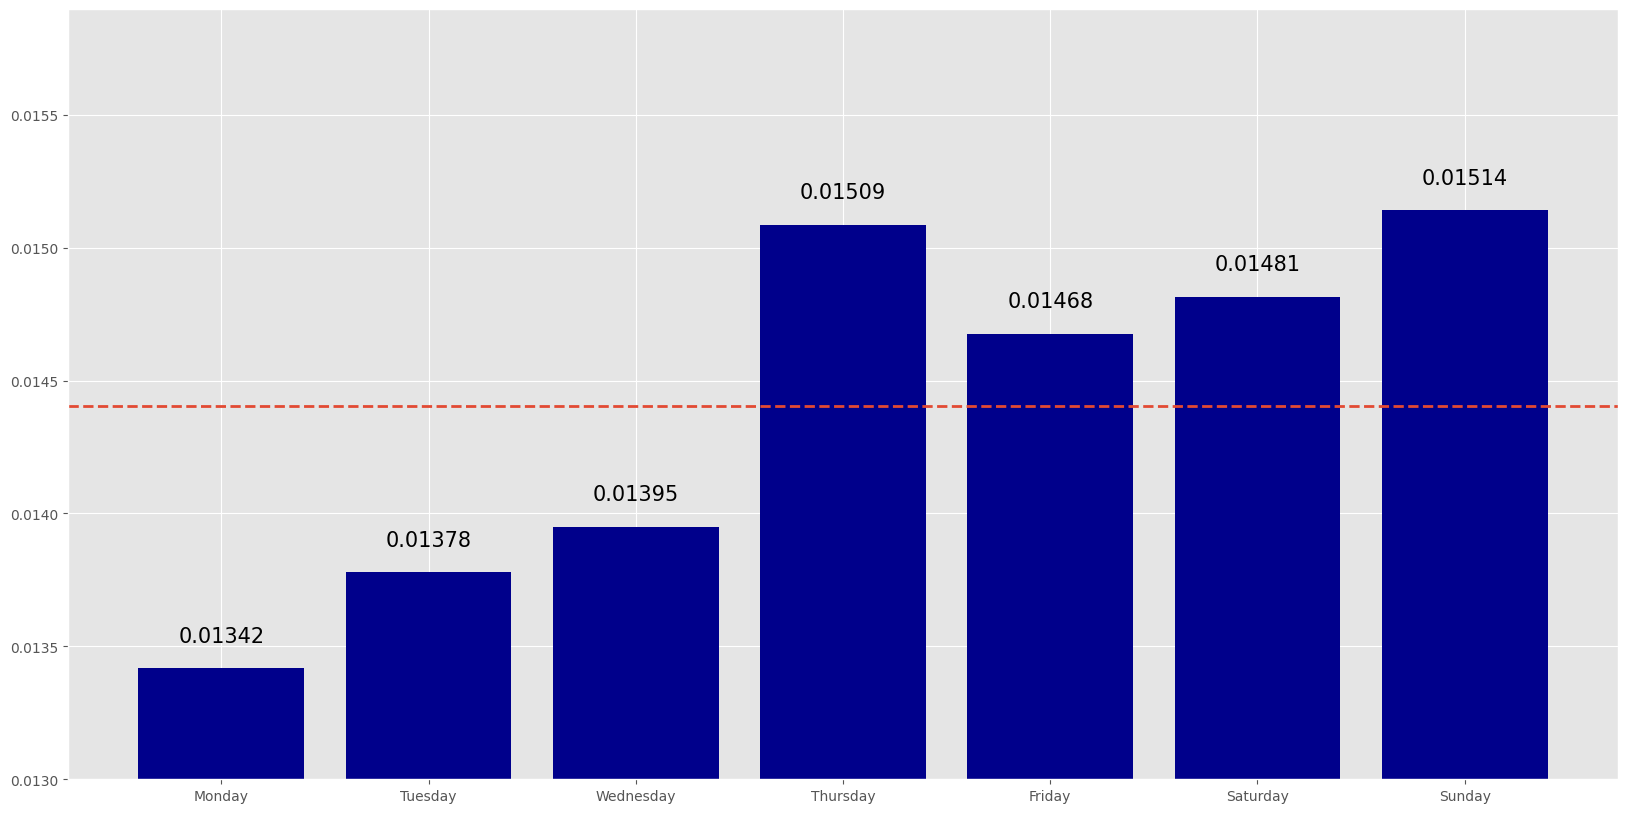

In [18]:
#plot
fig,ax=plt.subplots(figsize=(20,10))
plt.bar(data=y_dow,x=y_dow.index,height='fraud_label',color='darkblue')
ax.set_ylim(bottom=.013)
ax.axhline(y=y_avg,ls='--',lw=2)

for i in (y_dow.index):
    ax.text(i,y_dow.loc[i,'fraud_label']+0.0001,round(y_dow.loc[i,'fraud_label'],5),horizontalalignment='center',fontsize=15)


plt.savefig('risktable.png')
plt.show()

In [19]:
# Make new entities for variables
data['name']=data.firstname+data.lastname
data['fulladdress']=data.address+data.zip5
data['name_dob']=data.name+str(data.dob)
data['name_fulladdress']=data.name+data.address
data['name_homephone']=data.name+data.homephone
data['fulladdress_dob']=data.address+str(data.dob)
data['fulladdress_homephone']=data.address+data.homephone
data['dob_homephone']=str(data.dob)+data.homephone
data['homephone_name_dob']=data.homephone+data.name_dob

In [20]:
data.columns

Index(['record', 'date', 'ssn', 'firstname', 'lastname', 'address', 'zip5',
       'dob', 'homephone', 'fraud_label', 'dummy', 'dob_dt', 'age_when_apply',
       'dow', 'dow_risk', 'name', 'fulladdress', 'name_dob',
       'name_fulladdress', 'name_homephone', 'fulladdress_dob',
       'fulladdress_homephone', 'dob_homephone', 'homephone_name_dob'],
      dtype='object')

In [21]:
for i in list(data.iloc[:,np.r_[3:9,14:17]]):
    data['ssn_'+i]=str(data.ssn)+str(data[i])

In [22]:
data.columns

Index(['record', 'date', 'ssn', 'firstname', 'lastname', 'address', 'zip5',
       'dob', 'homephone', 'fraud_label', 'dummy', 'dob_dt', 'age_when_apply',
       'dow', 'dow_risk', 'name', 'fulladdress', 'name_dob',
       'name_fulladdress', 'name_homephone', 'fulladdress_dob',
       'fulladdress_homephone', 'dob_homephone', 'homephone_name_dob',
       'ssn_firstname', 'ssn_lastname', 'ssn_address', 'ssn_zip5', 'ssn_dob',
       'ssn_homephone', 'ssn_dow_risk', 'ssn_name', 'ssn_fulladdress'],
      dtype='object')

In [23]:
attributes=list(data.iloc[:,np.r_[2, 5, 6, 7, 8, 14:32]].columns)

In [24]:
attributes

['ssn',
 'address',
 'zip5',
 'dob',
 'homephone',
 'dow_risk',
 'name',
 'fulladdress',
 'name_dob',
 'name_fulladdress',
 'name_homephone',
 'fulladdress_dob',
 'fulladdress_homephone',
 'dob_homephone',
 'homephone_name_dob',
 'ssn_firstname',
 'ssn_lastname',
 'ssn_address',
 'ssn_zip5',
 'ssn_dob',
 'ssn_homephone',
 'ssn_dow_risk',
 'ssn_name']

In [25]:
len(attributes)

23

In [26]:
# if the number in any attribute group is really low it won't be a good linking attribute
att_2_remove = []
for att in attributes:
    num = len(data.groupby(att))
    print(att, num)
    if num <= 10:
        print('remove',att)
        att_2_remove.append(att)
    else:
        print('ok',att)
        
att_2_remove

ssn 852753
ok ssn
address 829852
ok address
zip5 26370
ok zip5
dob 169240
ok dob
homephone 106755
ok homephone
dow_risk 7
remove dow_risk
name 717126
ok name
fulladdress 845802
ok fulladdress
name_dob 717126
ok name_dob
name_fulladdress 858187
ok name_fulladdress
name_homephone 865464
ok name_homephone
fulladdress_dob 829852
ok fulladdress_dob
fulladdress_homephone 862918
ok fulladdress_homephone
dob_homephone 106755
ok dob_homephone
homephone_name_dob 865464
ok homephone_name_dob
ssn_firstname 1
remove ssn_firstname
ssn_lastname 1
remove ssn_lastname
ssn_address 1
remove ssn_address
ssn_zip5 1
remove ssn_zip5
ssn_dob 1
remove ssn_dob
ssn_homephone 1
remove ssn_homephone
ssn_dow_risk 1
remove ssn_dow_risk
ssn_name 1
remove ssn_name


['dow_risk',
 'ssn_firstname',
 'ssn_lastname',
 'ssn_address',
 'ssn_zip5',
 'ssn_dob',
 'ssn_homephone',
 'ssn_dow_risk',
 'ssn_name']

In [27]:
data.drop(columns=att_2_remove,inplace=True)
attributes = [i for i in attributes if i not in att_2_remove]
attributes

['ssn',
 'address',
 'zip5',
 'dob',
 'homephone',
 'name',
 'fulladdress',
 'name_dob',
 'name_fulladdress',
 'name_homephone',
 'fulladdress_dob',
 'fulladdress_homephone',
 'dob_homephone',
 'homephone_name_dob']

# Creating Variables

In [28]:
df=data.copy()
vars=data.copy()
df['check_date']=df.date
df['check_record']=df.record
numvars = 1
vars.shape

(1000000, 24)

In [29]:
icols = 0
for col in data.columns:
    print(icols, col)
    icols = icols+1

0 record
1 date
2 ssn
3 firstname
4 lastname
5 address
6 zip5
7 dob
8 homephone
9 fraud_label
10 dummy
11 dob_dt
12 age_when_apply
13 dow
14 name
15 fulladdress
16 name_dob
17 name_fulladdress
18 name_homephone
19 fulladdress_dob
20 fulladdress_homephone
21 dob_homephone
22 homephone_name_dob
23 ssn_fulladdress


## Velocity/counts and days since

In [30]:
begin=time.time()
for i in attributes:
    st=time.time()
    df_1=df[['record','date',i]]
    df_r=df[['check_record','check_date',i]]
    temp=pd.merge(df_1,df_r,left_on=i,right_on=i)
    
    #day since
    day_since_df=temp[temp.record>temp.check_record][['record','date','check_date']]\
    .groupby('record')[['date','check_date']].last()
    mapper=(day_since_df.date-day_since_df.check_date).dt.days
    vars[i+'_day_since']=vars.record.map(mapper)
    vars[i+'_day_since'].fillna(365,inplace=True)
    print(f'\n{i}_day_since --->Done')
    
    #Velocity
    for v in [0,1,3,7,14,30]:
        count_day_df=temp[((temp.check_date)>=(temp.date-dt.timedelta(v)))
                          &(temp.record>=temp.check_record)]
        col_name=f'{i}_count_{v}'
        mapper2=count_day_df.groupby('record')[i].count()
        vars[col_name]=vars.record.map(mapper2)
        print(f'{i}_count_{str(v)} --->Done')
    print(f'Run time for entity {i}--------{time.time()-st:0.2f}s')
print(f'Total run time:{(time.time()-begin)/60:0.2f}min')


ssn_day_since --->Done
ssn_count_0 --->Done
ssn_count_1 --->Done
ssn_count_3 --->Done
ssn_count_7 --->Done
ssn_count_14 --->Done
ssn_count_30 --->Done
Run time for entity ssn--------2.85s

address_day_since --->Done
address_count_0 --->Done
address_count_1 --->Done
address_count_3 --->Done
address_count_7 --->Done
address_count_14 --->Done
address_count_30 --->Done
Run time for entity address--------2.98s

zip5_day_since --->Done
zip5_count_0 --->Done
zip5_count_1 --->Done
zip5_count_3 --->Done
zip5_count_7 --->Done
zip5_count_14 --->Done
zip5_count_30 --->Done
Run time for entity zip5--------53.91s

dob_day_since --->Done
dob_count_0 --->Done
dob_count_1 --->Done
dob_count_3 --->Done
dob_count_7 --->Done
dob_count_14 --->Done
dob_count_30 --->Done
Run time for entity dob--------26.11s

homephone_day_since --->Done
homephone_count_0 --->Done
homephone_count_1 --->Done
homephone_count_3 --->Done
homephone_count_7 --->Done
homephone_count_14 --->Done
homephone_count_30 --->Done
Run time

/var/folders/tv/j28cf6c114v0ms8psrzsx1200000gp/T/ipykernel_23062/2314681417.py:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  vars[col_name]=vars.record.map(mapper2)


homephone_name_dob_count_14 --->Done
homephone_name_dob_count_30 --->Done
Run time for entity homephone_name_dob--------4.59s
Total run time:2.68min


/var/folders/tv/j28cf6c114v0ms8psrzsx1200000gp/T/ipykernel_23062/2314681417.py:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  vars[col_name]=vars.record.map(mapper2)


In [31]:
numvars_new = len(vars.columns)- icols - numvars
numvars = len(vars.columns) - icols
print("new variables:",numvars_new,"  total variables:",numvars)

new variables: 97   total variables: 98


In [32]:
# relative velocity
start=time.time()
for i in attributes:
    for d in ['0','1']:
        for dd in ['3','7','14','30']:
            vars[i+'_count_'+d+'_by_'+dd]=vars[i + '_count_' + d]/(vars[i+'_count_'+dd]/float(dd))
print(f'Total run time:{time.time()-start:0.2f}s')

/var/folders/tv/j28cf6c114v0ms8psrzsx1200000gp/T/ipykernel_23062/4002286599.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  vars[i+'_count_'+d+'_by_'+dd]=vars[i + '_count_' + d]/(vars[i+'_count_'+dd]/float(dd))
/var/folders/tv/j28cf6c114v0ms8psrzsx1200000gp/T/ipykernel_23062/4002286599.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  vars[i+'_count_'+d+'_by_'+dd]=vars[i + '_count_' + d]/(vars[i+'_count_'+dd]/float(dd))
/var/folders/tv/j28cf6c114v0ms8psrzsx1200000gp/T/ipykernel_23062/4002286599.py:6: PerformanceWarning: Da

Total run time:1.27s


/var/folders/tv/j28cf6c114v0ms8psrzsx1200000gp/T/ipykernel_23062/4002286599.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  vars[i+'_count_'+d+'_by_'+dd]=vars[i + '_count_' + d]/(vars[i+'_count_'+dd]/float(dd))


In [33]:
numvars_new = len(vars.columns) - icols - numvars
numvars = len(vars.columns) - icols
print("new variables:",numvars_new,"  total variables:",numvars)

new variables: 112   total variables: 210


## Counts by entities 

In [34]:
%%time
begin=time.time()
col_comb_set = set()
for i in attributes:
    for v in attributes:
       
        st=time.time()
        if i==v or col_comb_set.__contains__(i+"__"+v) or col_comb_set.__contains__(v+"__"+i):
            continue
        else:
            df_c=df[['record','date',i]]
            df_d=df[['check_record','check_date',i,v]]
            temp=pd.merge(df_c,df_d,left_on=i,right_on=i)
       
        #number of unique for particular field
        for t in [0,1,3,7,14,30,60]:
            count_day_df=temp[((temp.check_date) >= (temp.date-dt.timedelta(t))) & (temp.record >= temp.check_record)]
            col_name = f'{i}_unique_count_for_{v}_{t}'
            mapper = count_day_df.groupby(['record'])[v].nunique()
            # temp_df = pd.DataFrame(vars.record.map(mapper))
            # temp_df.columns = [col_name]
            # vars = pd.concat([vars,temp_df],axis=1)
            vars[col_name]=vars.record.map(mapper)
       
        print(f'Run time for entity {i} in field {v}--------{time.time()-st:0.2f}s')
        col_comb_set.add(i+"__"+v)   
        col_comb_set.add(v+"__"+i)
        print(f'Total run time:{(time.time()-begin)/60:0.2f}min')

<timed exec>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.ins

Run time for entity ssn in field address--------5.05s
Total run time:0.08min


<timed exec>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.ins

Run time for entity ssn in field zip5--------5.68s
Total run time:0.18min


<timed exec>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.ins

Run time for entity ssn in field dob--------6.10s
Total run time:0.28min


<timed exec>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.ins

Run time for entity ssn in field homephone--------5.70s
Total run time:0.38min


<timed exec>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.ins

Run time for entity ssn in field name--------5.03s
Total run time:0.46min


<timed exec>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.ins

Run time for entity ssn in field fulladdress--------5.16s
Total run time:0.55min


<timed exec>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.ins

Run time for entity ssn in field name_dob--------9.07s
Total run time:0.70min


<timed exec>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.ins

Run time for entity ssn in field name_fulladdress--------4.85s
Total run time:0.78min


<timed exec>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.ins

Run time for entity ssn in field name_homephone--------4.64s
Total run time:0.85min


<timed exec>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.ins

Run time for entity ssn in field fulladdress_dob--------9.52s
Total run time:1.01min


<timed exec>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.ins

Run time for entity ssn in field fulladdress_homephone--------5.50s
Total run time:1.10min


<timed exec>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.ins

Run time for entity ssn in field dob_homephone--------9.41s
Total run time:1.26min


<timed exec>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.ins

Run time for entity ssn in field homephone_name_dob--------9.60s
Total run time:1.42min


<timed exec>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.ins

Run time for entity address in field zip5--------6.01s
Total run time:1.52min


<timed exec>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.ins

Run time for entity address in field dob--------6.52s
Total run time:1.63min


<timed exec>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.ins

Run time for entity address in field homephone--------6.74s
Total run time:1.74min


<timed exec>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.ins

Run time for entity address in field name--------5.94s
Total run time:1.84min


<timed exec>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.ins

Run time for entity address in field fulladdress--------4.87s
Total run time:1.92min


<timed exec>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.ins

Run time for entity address in field name_dob--------10.10s
Total run time:2.09min


<timed exec>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.ins

Run time for entity address in field name_fulladdress--------5.49s
Total run time:2.18min


<timed exec>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.ins

Run time for entity address in field name_homephone--------5.65s
Total run time:2.28min


<timed exec>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.ins

Run time for entity address in field fulladdress_dob--------10.63s
Total run time:2.45min


<timed exec>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.ins

Run time for entity address in field fulladdress_homephone--------6.23s
Total run time:2.56min


<timed exec>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.ins

Run time for entity address in field dob_homephone--------9.94s
Total run time:2.72min


<timed exec>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.ins

Run time for entity address in field homephone_name_dob--------10.14s
Total run time:2.89min


<timed exec>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.ins

Run time for entity zip5 in field dob--------78.06s
Total run time:4.19min


<timed exec>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.ins

Run time for entity zip5 in field homephone--------83.08s
Total run time:5.58min


<timed exec>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.ins

Run time for entity zip5 in field name--------74.83s
Total run time:6.83min


<timed exec>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.ins

Run time for entity zip5 in field fulladdress--------69.70s
Total run time:7.99min


<timed exec>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.ins

Run time for entity zip5 in field name_dob--------94.89s
Total run time:9.57min


<timed exec>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.ins

Run time for entity zip5 in field name_fulladdress--------74.94s
Total run time:10.82min


<timed exec>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.ins

Run time for entity zip5 in field name_homephone--------76.11s
Total run time:12.09min


<timed exec>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.ins

Run time for entity zip5 in field fulladdress_dob--------96.10s
Total run time:13.69min


<timed exec>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.ins

Run time for entity zip5 in field fulladdress_homephone--------65.65s
Total run time:14.78min


<timed exec>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.ins

Run time for entity zip5 in field dob_homephone--------117.31s
Total run time:16.74min


<timed exec>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.ins

Run time for entity zip5 in field homephone_name_dob--------95.51s
Total run time:18.33min


<timed exec>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.ins

Run time for entity dob in field homephone--------35.76s
Total run time:18.93min


<timed exec>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.ins

Run time for entity dob in field name--------28.87s
Total run time:19.41min


<timed exec>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.ins

Run time for entity dob in field fulladdress--------30.02s
Total run time:19.91min


<timed exec>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.ins

Run time for entity dob in field name_dob--------40.61s
Total run time:20.58min


<timed exec>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.ins

Run time for entity dob in field name_fulladdress--------30.55s
Total run time:21.09min


<timed exec>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.ins

Run time for entity dob in field name_homephone--------30.16s
Total run time:21.60min


<timed exec>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.ins

Run time for entity dob in field fulladdress_dob--------41.94s
Total run time:22.30min


<timed exec>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.ins

Run time for entity dob in field fulladdress_homephone--------32.10s
Total run time:22.83min


<timed exec>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.ins

Run time for entity dob in field dob_homephone--------41.63s
Total run time:23.52min


<timed exec>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.ins

Run time for entity dob in field homephone_name_dob--------42.49s
Total run time:24.23min


<timed exec>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.ins

Run time for entity homephone in field name--------25.68s
Total run time:24.66min


<timed exec>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.ins

Run time for entity homephone in field fulladdress--------22.53s
Total run time:25.04min


<timed exec>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.ins

Run time for entity homephone in field name_dob--------33.16s
Total run time:25.59min


<timed exec>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.ins

Run time for entity homephone in field name_fulladdress--------23.62s
Total run time:25.98min


<timed exec>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.ins

Run time for entity homephone in field name_homephone--------23.20s
Total run time:26.37min


<timed exec>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.ins

Run time for entity homephone in field fulladdress_dob--------34.33s
Total run time:26.94min


<timed exec>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.ins

Run time for entity homephone in field fulladdress_homephone--------23.67s
Total run time:27.34min


<timed exec>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.ins

Run time for entity homephone in field dob_homephone--------30.62s
Total run time:27.85min


<timed exec>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.ins

Run time for entity homephone in field homephone_name_dob--------32.66s
Total run time:28.39min


<timed exec>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.ins

Run time for entity name in field fulladdress--------6.32s
Total run time:28.50min


<timed exec>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.ins

Run time for entity name in field name_dob--------10.92s
Total run time:28.68min


<timed exec>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.ins

Run time for entity name in field name_fulladdress--------6.31s
Total run time:28.78min


<timed exec>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.ins

Run time for entity name in field name_homephone--------6.19s
Total run time:28.89min


<timed exec>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.ins

Run time for entity name in field fulladdress_dob--------10.63s
Total run time:29.06min


<timed exec>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.ins

Run time for entity name in field fulladdress_homephone--------6.16s
Total run time:29.17min


<timed exec>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.ins

Run time for entity name in field dob_homephone--------11.29s
Total run time:29.35min


<timed exec>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.ins

Run time for entity name in field homephone_name_dob--------11.28s
Total run time:29.54min


<timed exec>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.ins

Run time for entity fulladdress in field name_dob--------9.51s
Total run time:29.70min


<timed exec>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.ins

Run time for entity fulladdress in field name_fulladdress--------5.01s
Total run time:29.78min


<timed exec>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.ins

Run time for entity fulladdress in field name_homephone--------4.93s
Total run time:29.87min


<timed exec>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.ins

Run time for entity fulladdress in field fulladdress_dob--------9.20s
Total run time:30.02min


<timed exec>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.ins

Run time for entity fulladdress in field fulladdress_homephone--------4.95s
Total run time:30.10min


<timed exec>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.ins

Run time for entity fulladdress in field dob_homephone--------9.38s
Total run time:30.26min


<timed exec>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.ins

Run time for entity fulladdress in field homephone_name_dob--------9.59s
Total run time:30.42min


<timed exec>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.ins

Run time for entity name_dob in field name_fulladdress--------6.78s
Total run time:30.53min


<timed exec>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.ins

Run time for entity name_dob in field name_homephone--------6.40s
Total run time:30.64min


<timed exec>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.ins

Run time for entity name_dob in field fulladdress_dob--------10.89s
Total run time:30.82min


<timed exec>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.ins

Run time for entity name_dob in field fulladdress_homephone--------6.32s
Total run time:30.92min


<timed exec>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.ins

Run time for entity name_dob in field dob_homephone--------10.68s
Total run time:31.10min


<timed exec>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.ins

Run time for entity name_dob in field homephone_name_dob--------11.78s
Total run time:31.30min


<timed exec>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.ins

Run time for entity name_fulladdress in field name_homephone--------4.82s
Total run time:31.38min


<timed exec>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.ins

Run time for entity name_fulladdress in field fulladdress_dob--------9.04s
Total run time:31.53min


<timed exec>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.ins

Run time for entity name_fulladdress in field fulladdress_homephone--------4.79s
Total run time:31.61min


<timed exec>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.ins

Run time for entity name_fulladdress in field dob_homephone--------8.72s
Total run time:31.76min


<timed exec>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.ins

Run time for entity name_fulladdress in field homephone_name_dob--------8.76s
Total run time:31.90min


<timed exec>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.ins

Run time for entity name_homephone in field fulladdress_dob--------9.03s
Total run time:32.05min


<timed exec>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.ins

Run time for entity name_homephone in field fulladdress_homephone--------4.51s
Total run time:32.13min


<timed exec>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.ins

Run time for entity name_homephone in field dob_homephone--------9.22s
Total run time:32.28min


<timed exec>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.ins

Run time for entity name_homephone in field homephone_name_dob--------9.26s
Total run time:32.43min


<timed exec>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.ins

Run time for entity fulladdress_dob in field fulladdress_homephone--------5.83s
Total run time:32.53min


<timed exec>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.ins

Run time for entity fulladdress_dob in field dob_homephone--------9.72s
Total run time:32.69min


<timed exec>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.ins

Run time for entity fulladdress_dob in field homephone_name_dob--------10.07s
Total run time:32.86min


<timed exec>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.ins

Run time for entity fulladdress_homephone in field dob_homephone--------9.22s
Total run time:33.02min


<timed exec>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.ins

Run time for entity fulladdress_homephone in field homephone_name_dob--------9.51s
Total run time:33.17min


<timed exec>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.ins

Run time for entity dob_homephone in field homephone_name_dob--------35.04s
Total run time:33.76min
CPU times: user 24min 8s, sys: 7min 49s, total: 31min 58s
Wall time: 33min 45s


<timed exec>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`


In [35]:
%%time
begin=time.time()
for i in attributes:
    for v in attributes:
        st=time.time()
        if i==v:
            continue
        else:
            df_c=df[['record','date',i]]
            df_d=df[['check_record','check_date',i,v]]
            temp=pd.merge(df_c,df_d,left_on=i,right_on=i)
        
        #number of unique for particular field
        for t in[0,1,3,7,14,30,60]:
            count_day_df=temp[((temp.check_date)>=(temp.date-dt.timedelta(t)))
                          &(temp.record>=temp.check_record)]
            col_name=f'{i}_unique_count_for_{v}_{t}'
            mapper=count_day_df.groupby(['record'])[v].nunique()
            vars[col_name]=vars.record.map(mapper)
        
        print(f'Run time for entity {i} in field {v}--------{time.time()-st:0.2f}s')
        
    print(f'Total run time:{(time.time()-begin)/60:0.2f}min')

Run time for entity ssn in field address--------5.51s
Run time for entity ssn in field zip5--------5.41s
Run time for entity ssn in field dob--------5.65s
Run time for entity ssn in field homephone--------5.57s
Run time for entity ssn in field name--------5.19s
Run time for entity ssn in field fulladdress--------4.76s
Run time for entity ssn in field name_dob--------9.28s
Run time for entity ssn in field name_fulladdress--------5.30s
Run time for entity ssn in field name_homephone--------4.88s
Run time for entity ssn in field fulladdress_dob--------9.07s
Run time for entity ssn in field fulladdress_homephone--------4.80s
Run time for entity ssn in field dob_homephone--------9.05s
Run time for entity ssn in field homephone_name_dob--------9.45s
Total run time:1.40min


<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.ins

Run time for entity address in field ssn--------5.03s
Run time for entity address in field zip5--------5.69s
Run time for entity address in field dob--------5.88s
Run time for entity address in field homephone--------6.52s
Run time for entity address in field name--------5.47s
Run time for entity address in field fulladdress--------5.03s
Run time for entity address in field name_dob--------9.81s
Run time for entity address in field name_fulladdress--------5.12s
Run time for entity address in field name_homephone--------5.32s
Run time for entity address in field fulladdress_dob--------9.31s
Run time for entity address in field fulladdress_homephone--------5.03s
Run time for entity address in field dob_homephone--------9.16s
Run time for entity address in field homephone_name_dob--------10.09s
Total run time:2.86min


<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.ins

Run time for entity zip5 in field ssn--------64.94s


<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.ins

Run time for entity zip5 in field address--------69.94s
Run time for entity zip5 in field dob--------76.34s
Run time for entity zip5 in field homephone--------77.00s
Run time for entity zip5 in field name--------75.84s
Run time for entity zip5 in field fulladdress--------68.85s
Run time for entity zip5 in field name_dob--------90.08s
Run time for entity zip5 in field name_fulladdress--------72.10s
Run time for entity zip5 in field name_homephone--------69.89s
Run time for entity zip5 in field fulladdress_dob--------86.15s
Run time for entity zip5 in field fulladdress_homephone--------73.06s
Run time for entity zip5 in field dob_homephone--------93.22s
Run time for entity zip5 in field homephone_name_dob--------111.41s
Total run time:20.00min


<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.ins

Run time for entity dob in field ssn--------33.23s


<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.ins

Run time for entity dob in field address--------31.76s


<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.ins

Run time for entity dob in field zip5--------32.17s
Run time for entity dob in field homephone--------33.55s
Run time for entity dob in field name--------40.20s
Run time for entity dob in field fulladdress--------40.84s
Run time for entity dob in field name_dob--------54.73s
Run time for entity dob in field name_fulladdress--------40.38s
Run time for entity dob in field name_homephone--------39.74s
Run time for entity dob in field fulladdress_dob--------58.00s
Run time for entity dob in field fulladdress_homephone--------42.36s
Run time for entity dob in field dob_homephone--------54.48s
Run time for entity dob in field homephone_name_dob--------58.60s
Total run time:29.34min


<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.ins

Run time for entity homephone in field ssn--------31.82s


<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.ins

Run time for entity homephone in field address--------30.37s


<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.ins

Run time for entity homephone in field zip5--------33.00s


<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.ins

Run time for entity homephone in field dob--------34.93s
Run time for entity homephone in field name--------30.38s
Run time for entity homephone in field fulladdress--------30.44s
Run time for entity homephone in field name_dob--------44.02s
Run time for entity homephone in field name_fulladdress--------32.19s
Run time for entity homephone in field name_homephone--------31.80s
Run time for entity homephone in field fulladdress_dob--------45.68s
Run time for entity homephone in field fulladdress_homephone--------33.94s
Run time for entity homephone in field dob_homephone--------39.35s
Run time for entity homephone in field homephone_name_dob--------41.28s
Total run time:36.99min


<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.ins

Run time for entity name in field ssn--------7.64s


<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.ins

Run time for entity name in field address--------7.52s


<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.ins

Run time for entity name in field zip5--------8.10s


<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.ins

Run time for entity name in field dob--------9.29s


<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.ins

Run time for entity name in field homephone--------8.65s
Run time for entity name in field fulladdress--------8.13s
Run time for entity name in field name_dob--------13.07s
Run time for entity name in field name_fulladdress--------7.80s
Run time for entity name in field name_homephone--------7.85s
Run time for entity name in field fulladdress_dob--------13.52s
Run time for entity name in field fulladdress_homephone--------7.87s
Run time for entity name in field dob_homephone--------14.26s
Run time for entity name in field homephone_name_dob--------13.09s
Total run time:39.10min


<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.ins

Run time for entity fulladdress in field ssn--------5.32s


<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.ins

Run time for entity fulladdress in field address--------5.55s


<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.ins

Run time for entity fulladdress in field zip5--------6.49s


<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.ins

Run time for entity fulladdress in field dob--------7.70s


<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.ins

Run time for entity fulladdress in field homephone--------6.96s


<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.ins

Run time for entity fulladdress in field name--------6.96s
Run time for entity fulladdress in field name_dob--------11.61s
Run time for entity fulladdress in field name_fulladdress--------6.14s
Run time for entity fulladdress in field name_homephone--------6.07s
Run time for entity fulladdress in field fulladdress_dob--------10.97s
Run time for entity fulladdress in field fulladdress_homephone--------5.96s
Run time for entity fulladdress in field dob_homephone--------11.47s
Run time for entity fulladdress in field homephone_name_dob--------12.70s
Total run time:40.84min


<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.ins

Run time for entity name_dob in field ssn--------7.85s


<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.ins

Run time for entity name_dob in field address--------8.64s


<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.ins

Run time for entity name_dob in field zip5--------9.42s


<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.ins

Run time for entity name_dob in field dob--------9.59s


<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.ins

Run time for entity name_dob in field homephone--------10.52s


<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.ins

Run time for entity name_dob in field name--------7.72s


<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.ins

Run time for entity name_dob in field fulladdress--------8.73s
Run time for entity name_dob in field name_fulladdress--------7.92s
Run time for entity name_dob in field name_homephone--------7.92s
Run time for entity name_dob in field fulladdress_dob--------12.82s
Run time for entity name_dob in field fulladdress_homephone--------6.53s
Run time for entity name_dob in field dob_homephone--------10.59s
Run time for entity name_dob in field homephone_name_dob--------11.92s
Total run time:42.84min


<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.ins

Run time for entity name_fulladdress in field ssn--------5.63s


<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.ins

Run time for entity name_fulladdress in field address--------5.98s


<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.ins

Run time for entity name_fulladdress in field zip5--------6.55s


<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.ins

Run time for entity name_fulladdress in field dob--------7.56s


<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.ins

Run time for entity name_fulladdress in field homephone--------5.90s


<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.ins

Run time for entity name_fulladdress in field name--------5.94s


<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.ins

Run time for entity name_fulladdress in field fulladdress--------5.11s


<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.ins

Run time for entity name_fulladdress in field name_dob--------9.37s
Run time for entity name_fulladdress in field name_homephone--------6.07s
Run time for entity name_fulladdress in field fulladdress_dob--------10.08s
Run time for entity name_fulladdress in field fulladdress_homephone--------4.97s
Run time for entity name_fulladdress in field dob_homephone--------9.46s
Run time for entity name_fulladdress in field homephone_name_dob--------9.20s
Total run time:44.37min


<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.ins

Run time for entity name_homephone in field ssn--------4.58s


<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.ins

Run time for entity name_homephone in field address--------5.05s


<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.ins

Run time for entity name_homephone in field zip5--------5.43s


<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.ins

Run time for entity name_homephone in field dob--------5.99s


<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.ins

Run time for entity name_homephone in field homephone--------7.00s


<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.ins

Run time for entity name_homephone in field name--------5.63s


<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.ins

Run time for entity name_homephone in field fulladdress--------5.52s


<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.ins

Run time for entity name_homephone in field name_dob--------10.07s


<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.ins

Run time for entity name_homephone in field name_fulladdress--------5.81s
Run time for entity name_homephone in field fulladdress_dob--------10.11s
Run time for entity name_homephone in field fulladdress_homephone--------5.37s
Run time for entity name_homephone in field dob_homephone--------9.38s
Run time for entity name_homephone in field homephone_name_dob--------10.62s
Total run time:45.88min


<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.ins

Run time for entity fulladdress_dob in field ssn--------4.93s


<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.ins

Run time for entity fulladdress_dob in field address--------4.78s


<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.ins

Run time for entity fulladdress_dob in field zip5--------6.01s


<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.ins

Run time for entity fulladdress_dob in field dob--------5.58s


<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.ins

Run time for entity fulladdress_dob in field homephone--------5.90s


<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.ins

Run time for entity fulladdress_dob in field name--------5.75s


<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.ins

Run time for entity fulladdress_dob in field fulladdress--------5.85s


<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.ins

Run time for entity fulladdress_dob in field name_dob--------10.80s


<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.ins

Run time for entity fulladdress_dob in field name_fulladdress--------6.98s


<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.ins

Run time for entity fulladdress_dob in field name_homephone--------5.23s
Run time for entity fulladdress_dob in field fulladdress_homephone--------5.25s
Run time for entity fulladdress_dob in field dob_homephone--------10.87s
Run time for entity fulladdress_dob in field homephone_name_dob--------12.09s
Total run time:47.38min


<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.ins

Run time for entity fulladdress_homephone in field ssn--------7.01s


<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.ins

Run time for entity fulladdress_homephone in field address--------6.39s


<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.ins

Run time for entity fulladdress_homephone in field zip5--------5.88s


<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.ins

Run time for entity fulladdress_homephone in field dob--------6.48s


<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.ins

Run time for entity fulladdress_homephone in field homephone--------8.64s


<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.ins

Run time for entity fulladdress_homephone in field name--------5.78s


<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.ins

Run time for entity fulladdress_homephone in field fulladdress--------4.89s


<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.ins

Run time for entity fulladdress_homephone in field name_dob--------10.25s


<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.ins

Run time for entity fulladdress_homephone in field name_fulladdress--------5.45s


<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.ins

Run time for entity fulladdress_homephone in field name_homephone--------6.85s


<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.ins

Run time for entity fulladdress_homephone in field fulladdress_dob--------10.58s
Run time for entity fulladdress_homephone in field dob_homephone--------9.71s
Run time for entity fulladdress_homephone in field homephone_name_dob--------9.11s
Total run time:49.00min


<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.ins

Run time for entity dob_homephone in field ssn--------22.81s


<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.ins

Run time for entity dob_homephone in field address--------26.18s


<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.ins

Run time for entity dob_homephone in field zip5--------25.72s


<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.ins

Run time for entity dob_homephone in field dob--------23.80s


<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.ins

Run time for entity dob_homephone in field homephone--------21.26s


<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.ins

Run time for entity dob_homephone in field name--------23.89s


<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.ins

Run time for entity dob_homephone in field fulladdress--------24.51s


<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.ins

Run time for entity dob_homephone in field name_dob--------33.41s


<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.ins

Run time for entity dob_homephone in field name_fulladdress--------25.31s


<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.ins

Run time for entity dob_homephone in field name_homephone--------23.51s


<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.ins

Run time for entity dob_homephone in field fulladdress_dob--------33.04s


<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.ins

Run time for entity dob_homephone in field fulladdress_homephone--------25.33s
Run time for entity dob_homephone in field homephone_name_dob--------32.53s
Total run time:54.69min


<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.ins

Run time for entity homephone_name_dob in field ssn--------5.43s


<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.ins

Run time for entity homephone_name_dob in field address--------4.71s


<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.ins

Run time for entity homephone_name_dob in field zip5--------5.20s


<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.ins

Run time for entity homephone_name_dob in field dob--------5.61s


<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.ins

Run time for entity homephone_name_dob in field homephone--------5.57s


<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.ins

Run time for entity homephone_name_dob in field name--------5.06s


<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.ins

Run time for entity homephone_name_dob in field fulladdress--------4.80s


<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.ins

Run time for entity homephone_name_dob in field name_dob--------9.55s


<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.ins

Run time for entity homephone_name_dob in field name_fulladdress--------5.60s


<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.ins

Run time for entity homephone_name_dob in field name_homephone--------4.92s


<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.ins

Run time for entity homephone_name_dob in field fulladdress_dob--------9.84s


<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.ins

Run time for entity homephone_name_dob in field fulladdress_homephone--------4.97s


<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.ins

Run time for entity homephone_name_dob in field dob_homephone--------9.22s
Total run time:56.03min
CPU times: user 40min 39s, sys: 12min 6s, total: 52min 46s
Wall time: 56min 1s


<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`


In [36]:
del df

In [37]:
numvars_new = len(vars.columns) - icols - numvars
numvars = len(vars.columns) - icols
print("new variables:",numvars_new,"  total variables:",numvars)

new variables: 1274   total variables: 1484


In [38]:
print('time to here: ',dt.datetime.now() - start_time)

time to here:  1:34:20.206945


## Maximum Indicator

In [39]:
# Maximum Indicator
begin=time.time()
for i in attributes:
    print(i)
    for v in ['1','3','7','30']:
        st=time.time()
        mapper=vars.groupby(i)[i+'_count_'+v].max()
        vars['max_count_by_'+i+'_'+v]=vars[i].map(mapper)
        print(f'max_count_by_{i}_{v} --->Done')
    print(f'Run time for entity {i}--------{time.time()-st}s')
print(f'Total run time:{(time.time()-begin)/60:0.2f}min')

ssn


/var/folders/tv/j28cf6c114v0ms8psrzsx1200000gp/T/ipykernel_23062/1802515304.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  vars['max_count_by_'+i+'_'+v]=vars[i].map(mapper)


max_count_by_ssn_1 --->Done


/var/folders/tv/j28cf6c114v0ms8psrzsx1200000gp/T/ipykernel_23062/1802515304.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  vars['max_count_by_'+i+'_'+v]=vars[i].map(mapper)


max_count_by_ssn_3 --->Done


/var/folders/tv/j28cf6c114v0ms8psrzsx1200000gp/T/ipykernel_23062/1802515304.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  vars['max_count_by_'+i+'_'+v]=vars[i].map(mapper)


max_count_by_ssn_7 --->Done


/var/folders/tv/j28cf6c114v0ms8psrzsx1200000gp/T/ipykernel_23062/1802515304.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  vars['max_count_by_'+i+'_'+v]=vars[i].map(mapper)


max_count_by_ssn_30 --->Done
Run time for entity ssn--------2.1401679515838623s
address


/var/folders/tv/j28cf6c114v0ms8psrzsx1200000gp/T/ipykernel_23062/1802515304.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  vars['max_count_by_'+i+'_'+v]=vars[i].map(mapper)


max_count_by_address_1 --->Done


/var/folders/tv/j28cf6c114v0ms8psrzsx1200000gp/T/ipykernel_23062/1802515304.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  vars['max_count_by_'+i+'_'+v]=vars[i].map(mapper)


max_count_by_address_3 --->Done


/var/folders/tv/j28cf6c114v0ms8psrzsx1200000gp/T/ipykernel_23062/1802515304.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  vars['max_count_by_'+i+'_'+v]=vars[i].map(mapper)


max_count_by_address_7 --->Done


/var/folders/tv/j28cf6c114v0ms8psrzsx1200000gp/T/ipykernel_23062/1802515304.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  vars['max_count_by_'+i+'_'+v]=vars[i].map(mapper)


max_count_by_address_30 --->Done
Run time for entity address--------1.8727028369903564s
zip5


/var/folders/tv/j28cf6c114v0ms8psrzsx1200000gp/T/ipykernel_23062/1802515304.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  vars['max_count_by_'+i+'_'+v]=vars[i].map(mapper)


max_count_by_zip5_1 --->Done


/var/folders/tv/j28cf6c114v0ms8psrzsx1200000gp/T/ipykernel_23062/1802515304.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  vars['max_count_by_'+i+'_'+v]=vars[i].map(mapper)


max_count_by_zip5_3 --->Done


/var/folders/tv/j28cf6c114v0ms8psrzsx1200000gp/T/ipykernel_23062/1802515304.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  vars['max_count_by_'+i+'_'+v]=vars[i].map(mapper)


max_count_by_zip5_7 --->Done


/var/folders/tv/j28cf6c114v0ms8psrzsx1200000gp/T/ipykernel_23062/1802515304.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  vars['max_count_by_'+i+'_'+v]=vars[i].map(mapper)


max_count_by_zip5_30 --->Done
Run time for entity zip5--------0.23187780380249023s
dob


/var/folders/tv/j28cf6c114v0ms8psrzsx1200000gp/T/ipykernel_23062/1802515304.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  vars['max_count_by_'+i+'_'+v]=vars[i].map(mapper)


max_count_by_dob_1 --->Done


/var/folders/tv/j28cf6c114v0ms8psrzsx1200000gp/T/ipykernel_23062/1802515304.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  vars['max_count_by_'+i+'_'+v]=vars[i].map(mapper)


max_count_by_dob_3 --->Done


/var/folders/tv/j28cf6c114v0ms8psrzsx1200000gp/T/ipykernel_23062/1802515304.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  vars['max_count_by_'+i+'_'+v]=vars[i].map(mapper)


max_count_by_dob_7 --->Done


/var/folders/tv/j28cf6c114v0ms8psrzsx1200000gp/T/ipykernel_23062/1802515304.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  vars['max_count_by_'+i+'_'+v]=vars[i].map(mapper)


max_count_by_dob_30 --->Done
Run time for entity dob--------0.47421813011169434s
homephone


/var/folders/tv/j28cf6c114v0ms8psrzsx1200000gp/T/ipykernel_23062/1802515304.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  vars['max_count_by_'+i+'_'+v]=vars[i].map(mapper)


max_count_by_homephone_1 --->Done


/var/folders/tv/j28cf6c114v0ms8psrzsx1200000gp/T/ipykernel_23062/1802515304.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  vars['max_count_by_'+i+'_'+v]=vars[i].map(mapper)


max_count_by_homephone_3 --->Done


/var/folders/tv/j28cf6c114v0ms8psrzsx1200000gp/T/ipykernel_23062/1802515304.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  vars['max_count_by_'+i+'_'+v]=vars[i].map(mapper)


max_count_by_homephone_7 --->Done


/var/folders/tv/j28cf6c114v0ms8psrzsx1200000gp/T/ipykernel_23062/1802515304.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  vars['max_count_by_'+i+'_'+v]=vars[i].map(mapper)


max_count_by_homephone_30 --->Done
Run time for entity homephone--------0.47986268997192383s
name


/var/folders/tv/j28cf6c114v0ms8psrzsx1200000gp/T/ipykernel_23062/1802515304.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  vars['max_count_by_'+i+'_'+v]=vars[i].map(mapper)


max_count_by_name_1 --->Done


/var/folders/tv/j28cf6c114v0ms8psrzsx1200000gp/T/ipykernel_23062/1802515304.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  vars['max_count_by_'+i+'_'+v]=vars[i].map(mapper)


max_count_by_name_3 --->Done


/var/folders/tv/j28cf6c114v0ms8psrzsx1200000gp/T/ipykernel_23062/1802515304.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  vars['max_count_by_'+i+'_'+v]=vars[i].map(mapper)


max_count_by_name_7 --->Done


/var/folders/tv/j28cf6c114v0ms8psrzsx1200000gp/T/ipykernel_23062/1802515304.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  vars['max_count_by_'+i+'_'+v]=vars[i].map(mapper)


max_count_by_name_30 --->Done
Run time for entity name--------1.880302906036377s
fulladdress


/var/folders/tv/j28cf6c114v0ms8psrzsx1200000gp/T/ipykernel_23062/1802515304.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  vars['max_count_by_'+i+'_'+v]=vars[i].map(mapper)


max_count_by_fulladdress_1 --->Done


/var/folders/tv/j28cf6c114v0ms8psrzsx1200000gp/T/ipykernel_23062/1802515304.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  vars['max_count_by_'+i+'_'+v]=vars[i].map(mapper)


max_count_by_fulladdress_3 --->Done


/var/folders/tv/j28cf6c114v0ms8psrzsx1200000gp/T/ipykernel_23062/1802515304.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  vars['max_count_by_'+i+'_'+v]=vars[i].map(mapper)


max_count_by_fulladdress_7 --->Done


/var/folders/tv/j28cf6c114v0ms8psrzsx1200000gp/T/ipykernel_23062/1802515304.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  vars['max_count_by_'+i+'_'+v]=vars[i].map(mapper)


max_count_by_fulladdress_30 --->Done
Run time for entity fulladdress--------1.9989051818847656s
name_dob


/var/folders/tv/j28cf6c114v0ms8psrzsx1200000gp/T/ipykernel_23062/1802515304.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  vars['max_count_by_'+i+'_'+v]=vars[i].map(mapper)


max_count_by_name_dob_1 --->Done


/var/folders/tv/j28cf6c114v0ms8psrzsx1200000gp/T/ipykernel_23062/1802515304.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  vars['max_count_by_'+i+'_'+v]=vars[i].map(mapper)


max_count_by_name_dob_3 --->Done


/var/folders/tv/j28cf6c114v0ms8psrzsx1200000gp/T/ipykernel_23062/1802515304.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  vars['max_count_by_'+i+'_'+v]=vars[i].map(mapper)


max_count_by_name_dob_7 --->Done


/var/folders/tv/j28cf6c114v0ms8psrzsx1200000gp/T/ipykernel_23062/1802515304.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  vars['max_count_by_'+i+'_'+v]=vars[i].map(mapper)


max_count_by_name_dob_30 --->Done
Run time for entity name_dob--------2.612194061279297s
name_fulladdress


/var/folders/tv/j28cf6c114v0ms8psrzsx1200000gp/T/ipykernel_23062/1802515304.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  vars['max_count_by_'+i+'_'+v]=vars[i].map(mapper)


max_count_by_name_fulladdress_1 --->Done


/var/folders/tv/j28cf6c114v0ms8psrzsx1200000gp/T/ipykernel_23062/1802515304.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  vars['max_count_by_'+i+'_'+v]=vars[i].map(mapper)


max_count_by_name_fulladdress_3 --->Done


/var/folders/tv/j28cf6c114v0ms8psrzsx1200000gp/T/ipykernel_23062/1802515304.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  vars['max_count_by_'+i+'_'+v]=vars[i].map(mapper)


max_count_by_name_fulladdress_7 --->Done


/var/folders/tv/j28cf6c114v0ms8psrzsx1200000gp/T/ipykernel_23062/1802515304.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  vars['max_count_by_'+i+'_'+v]=vars[i].map(mapper)


max_count_by_name_fulladdress_30 --->Done
Run time for entity name_fulladdress--------2.031912088394165s
name_homephone


/var/folders/tv/j28cf6c114v0ms8psrzsx1200000gp/T/ipykernel_23062/1802515304.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  vars['max_count_by_'+i+'_'+v]=vars[i].map(mapper)


max_count_by_name_homephone_1 --->Done


/var/folders/tv/j28cf6c114v0ms8psrzsx1200000gp/T/ipykernel_23062/1802515304.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  vars['max_count_by_'+i+'_'+v]=vars[i].map(mapper)


max_count_by_name_homephone_3 --->Done


/var/folders/tv/j28cf6c114v0ms8psrzsx1200000gp/T/ipykernel_23062/1802515304.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  vars['max_count_by_'+i+'_'+v]=vars[i].map(mapper)


max_count_by_name_homephone_7 --->Done


/var/folders/tv/j28cf6c114v0ms8psrzsx1200000gp/T/ipykernel_23062/1802515304.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  vars['max_count_by_'+i+'_'+v]=vars[i].map(mapper)


max_count_by_name_homephone_30 --->Done
Run time for entity name_homephone--------2.0468153953552246s
fulladdress_dob


/var/folders/tv/j28cf6c114v0ms8psrzsx1200000gp/T/ipykernel_23062/1802515304.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  vars['max_count_by_'+i+'_'+v]=vars[i].map(mapper)


max_count_by_fulladdress_dob_1 --->Done


/var/folders/tv/j28cf6c114v0ms8psrzsx1200000gp/T/ipykernel_23062/1802515304.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  vars['max_count_by_'+i+'_'+v]=vars[i].map(mapper)


max_count_by_fulladdress_dob_3 --->Done


/var/folders/tv/j28cf6c114v0ms8psrzsx1200000gp/T/ipykernel_23062/1802515304.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  vars['max_count_by_'+i+'_'+v]=vars[i].map(mapper)


max_count_by_fulladdress_dob_7 --->Done


/var/folders/tv/j28cf6c114v0ms8psrzsx1200000gp/T/ipykernel_23062/1802515304.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  vars['max_count_by_'+i+'_'+v]=vars[i].map(mapper)


max_count_by_fulladdress_dob_30 --->Done
Run time for entity fulladdress_dob--------2.712463855743408s
fulladdress_homephone


/var/folders/tv/j28cf6c114v0ms8psrzsx1200000gp/T/ipykernel_23062/1802515304.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  vars['max_count_by_'+i+'_'+v]=vars[i].map(mapper)


max_count_by_fulladdress_homephone_1 --->Done


/var/folders/tv/j28cf6c114v0ms8psrzsx1200000gp/T/ipykernel_23062/1802515304.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  vars['max_count_by_'+i+'_'+v]=vars[i].map(mapper)


max_count_by_fulladdress_homephone_3 --->Done


/var/folders/tv/j28cf6c114v0ms8psrzsx1200000gp/T/ipykernel_23062/1802515304.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  vars['max_count_by_'+i+'_'+v]=vars[i].map(mapper)


max_count_by_fulladdress_homephone_7 --->Done


/var/folders/tv/j28cf6c114v0ms8psrzsx1200000gp/T/ipykernel_23062/1802515304.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  vars['max_count_by_'+i+'_'+v]=vars[i].map(mapper)


max_count_by_fulladdress_homephone_30 --->Done
Run time for entity fulladdress_homephone--------2.074331045150757s
dob_homephone


/var/folders/tv/j28cf6c114v0ms8psrzsx1200000gp/T/ipykernel_23062/1802515304.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  vars['max_count_by_'+i+'_'+v]=vars[i].map(mapper)


max_count_by_dob_homephone_1 --->Done


/var/folders/tv/j28cf6c114v0ms8psrzsx1200000gp/T/ipykernel_23062/1802515304.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  vars['max_count_by_'+i+'_'+v]=vars[i].map(mapper)


max_count_by_dob_homephone_3 --->Done


/var/folders/tv/j28cf6c114v0ms8psrzsx1200000gp/T/ipykernel_23062/1802515304.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  vars['max_count_by_'+i+'_'+v]=vars[i].map(mapper)


max_count_by_dob_homephone_7 --->Done


/var/folders/tv/j28cf6c114v0ms8psrzsx1200000gp/T/ipykernel_23062/1802515304.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  vars['max_count_by_'+i+'_'+v]=vars[i].map(mapper)


max_count_by_dob_homephone_30 --->Done
Run time for entity dob_homephone--------1.3065688610076904s
homephone_name_dob


/var/folders/tv/j28cf6c114v0ms8psrzsx1200000gp/T/ipykernel_23062/1802515304.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  vars['max_count_by_'+i+'_'+v]=vars[i].map(mapper)


max_count_by_homephone_name_dob_1 --->Done


/var/folders/tv/j28cf6c114v0ms8psrzsx1200000gp/T/ipykernel_23062/1802515304.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  vars['max_count_by_'+i+'_'+v]=vars[i].map(mapper)


max_count_by_homephone_name_dob_3 --->Done


/var/folders/tv/j28cf6c114v0ms8psrzsx1200000gp/T/ipykernel_23062/1802515304.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  vars['max_count_by_'+i+'_'+v]=vars[i].map(mapper)


max_count_by_homephone_name_dob_7 --->Done
max_count_by_homephone_name_dob_30 --->Done
Run time for entity homephone_name_dob--------2.7401411533355713s
Total run time:1.67min


/var/folders/tv/j28cf6c114v0ms8psrzsx1200000gp/T/ipykernel_23062/1802515304.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  vars['max_count_by_'+i+'_'+v]=vars[i].map(mapper)


In [40]:
numvars_new = len(vars.columns) - icols - numvars
numvars = len(vars.columns) - icols
print("new variables:",numvars_new,"  total variables:",numvars)

new variables: 56   total variables: 1540


## Age Indicator

In [41]:
# Age Indicator
data['age_when_apply']=data['date'].dt.year-data['dob_dt'].dt.year
begin=time.time()
for i in attributes:
    st=time.time()
    mapper_max=vars.groupby(i)['age_when_apply'].max()
    mapper_mean=vars.groupby(i)['age_when_apply'].mean()
    mapper_min=vars.groupby(i)['age_when_apply'].min()
    vars['max_age_by_'+i]=vars[i].map(mapper_max)
    vars['mean_age_by_'+i]=vars[i].map(mapper_mean)
    vars['min_age_by_'+i]=vars[i].map(mapper_min)
    print(f'age_by_{i} --->Done')
print(f'Total run time:{(time.time()-begin)/60:0.2f}min')

/var/folders/tv/j28cf6c114v0ms8psrzsx1200000gp/T/ipykernel_23062/865726071.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  vars['max_age_by_'+i]=vars[i].map(mapper_max)
/var/folders/tv/j28cf6c114v0ms8psrzsx1200000gp/T/ipykernel_23062/865726071.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  vars['mean_age_by_'+i]=vars[i].map(mapper_mean)
/var/folders/tv/j28cf6c114v0ms8psrzsx1200000gp/T/ipykernel_23062/865726071.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.inser

age_by_ssn --->Done


/var/folders/tv/j28cf6c114v0ms8psrzsx1200000gp/T/ipykernel_23062/865726071.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  vars['max_age_by_'+i]=vars[i].map(mapper_max)
/var/folders/tv/j28cf6c114v0ms8psrzsx1200000gp/T/ipykernel_23062/865726071.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  vars['mean_age_by_'+i]=vars[i].map(mapper_mean)
/var/folders/tv/j28cf6c114v0ms8psrzsx1200000gp/T/ipykernel_23062/865726071.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.inser

age_by_address --->Done


/var/folders/tv/j28cf6c114v0ms8psrzsx1200000gp/T/ipykernel_23062/865726071.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  vars['max_age_by_'+i]=vars[i].map(mapper_max)
/var/folders/tv/j28cf6c114v0ms8psrzsx1200000gp/T/ipykernel_23062/865726071.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  vars['mean_age_by_'+i]=vars[i].map(mapper_mean)
/var/folders/tv/j28cf6c114v0ms8psrzsx1200000gp/T/ipykernel_23062/865726071.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.inser

age_by_zip5 --->Done


/var/folders/tv/j28cf6c114v0ms8psrzsx1200000gp/T/ipykernel_23062/865726071.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  vars['max_age_by_'+i]=vars[i].map(mapper_max)
/var/folders/tv/j28cf6c114v0ms8psrzsx1200000gp/T/ipykernel_23062/865726071.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  vars['mean_age_by_'+i]=vars[i].map(mapper_mean)
/var/folders/tv/j28cf6c114v0ms8psrzsx1200000gp/T/ipykernel_23062/865726071.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.inser

age_by_dob --->Done


/var/folders/tv/j28cf6c114v0ms8psrzsx1200000gp/T/ipykernel_23062/865726071.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  vars['max_age_by_'+i]=vars[i].map(mapper_max)
/var/folders/tv/j28cf6c114v0ms8psrzsx1200000gp/T/ipykernel_23062/865726071.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  vars['mean_age_by_'+i]=vars[i].map(mapper_mean)
/var/folders/tv/j28cf6c114v0ms8psrzsx1200000gp/T/ipykernel_23062/865726071.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.inser

age_by_homephone --->Done


/var/folders/tv/j28cf6c114v0ms8psrzsx1200000gp/T/ipykernel_23062/865726071.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  vars['max_age_by_'+i]=vars[i].map(mapper_max)
/var/folders/tv/j28cf6c114v0ms8psrzsx1200000gp/T/ipykernel_23062/865726071.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  vars['mean_age_by_'+i]=vars[i].map(mapper_mean)
/var/folders/tv/j28cf6c114v0ms8psrzsx1200000gp/T/ipykernel_23062/865726071.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.inser

age_by_name --->Done


/var/folders/tv/j28cf6c114v0ms8psrzsx1200000gp/T/ipykernel_23062/865726071.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  vars['max_age_by_'+i]=vars[i].map(mapper_max)
/var/folders/tv/j28cf6c114v0ms8psrzsx1200000gp/T/ipykernel_23062/865726071.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  vars['mean_age_by_'+i]=vars[i].map(mapper_mean)
/var/folders/tv/j28cf6c114v0ms8psrzsx1200000gp/T/ipykernel_23062/865726071.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.inser

age_by_fulladdress --->Done


/var/folders/tv/j28cf6c114v0ms8psrzsx1200000gp/T/ipykernel_23062/865726071.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  vars['max_age_by_'+i]=vars[i].map(mapper_max)
/var/folders/tv/j28cf6c114v0ms8psrzsx1200000gp/T/ipykernel_23062/865726071.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  vars['mean_age_by_'+i]=vars[i].map(mapper_mean)
/var/folders/tv/j28cf6c114v0ms8psrzsx1200000gp/T/ipykernel_23062/865726071.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.inser

age_by_name_dob --->Done


/var/folders/tv/j28cf6c114v0ms8psrzsx1200000gp/T/ipykernel_23062/865726071.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  vars['max_age_by_'+i]=vars[i].map(mapper_max)
/var/folders/tv/j28cf6c114v0ms8psrzsx1200000gp/T/ipykernel_23062/865726071.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  vars['mean_age_by_'+i]=vars[i].map(mapper_mean)
/var/folders/tv/j28cf6c114v0ms8psrzsx1200000gp/T/ipykernel_23062/865726071.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.inser

age_by_name_fulladdress --->Done


/var/folders/tv/j28cf6c114v0ms8psrzsx1200000gp/T/ipykernel_23062/865726071.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  vars['max_age_by_'+i]=vars[i].map(mapper_max)
/var/folders/tv/j28cf6c114v0ms8psrzsx1200000gp/T/ipykernel_23062/865726071.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  vars['mean_age_by_'+i]=vars[i].map(mapper_mean)
/var/folders/tv/j28cf6c114v0ms8psrzsx1200000gp/T/ipykernel_23062/865726071.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.inser

age_by_name_homephone --->Done


/var/folders/tv/j28cf6c114v0ms8psrzsx1200000gp/T/ipykernel_23062/865726071.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  vars['max_age_by_'+i]=vars[i].map(mapper_max)
/var/folders/tv/j28cf6c114v0ms8psrzsx1200000gp/T/ipykernel_23062/865726071.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  vars['mean_age_by_'+i]=vars[i].map(mapper_mean)
/var/folders/tv/j28cf6c114v0ms8psrzsx1200000gp/T/ipykernel_23062/865726071.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.inser

age_by_fulladdress_dob --->Done


/var/folders/tv/j28cf6c114v0ms8psrzsx1200000gp/T/ipykernel_23062/865726071.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  vars['max_age_by_'+i]=vars[i].map(mapper_max)
/var/folders/tv/j28cf6c114v0ms8psrzsx1200000gp/T/ipykernel_23062/865726071.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  vars['mean_age_by_'+i]=vars[i].map(mapper_mean)
/var/folders/tv/j28cf6c114v0ms8psrzsx1200000gp/T/ipykernel_23062/865726071.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.inser

age_by_fulladdress_homephone --->Done


/var/folders/tv/j28cf6c114v0ms8psrzsx1200000gp/T/ipykernel_23062/865726071.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  vars['max_age_by_'+i]=vars[i].map(mapper_max)
/var/folders/tv/j28cf6c114v0ms8psrzsx1200000gp/T/ipykernel_23062/865726071.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  vars['mean_age_by_'+i]=vars[i].map(mapper_mean)
/var/folders/tv/j28cf6c114v0ms8psrzsx1200000gp/T/ipykernel_23062/865726071.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.inser

age_by_dob_homephone --->Done


/var/folders/tv/j28cf6c114v0ms8psrzsx1200000gp/T/ipykernel_23062/865726071.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  vars['max_age_by_'+i]=vars[i].map(mapper_max)
/var/folders/tv/j28cf6c114v0ms8psrzsx1200000gp/T/ipykernel_23062/865726071.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  vars['mean_age_by_'+i]=vars[i].map(mapper_mean)


age_by_homephone_name_dob --->Done
Total run time:1.23min


/var/folders/tv/j28cf6c114v0ms8psrzsx1200000gp/T/ipykernel_23062/865726071.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  vars['min_age_by_'+i]=vars[i].map(mapper_min)


In [42]:
del data

In [43]:
vars.shape

(1000000, 1606)

In [44]:
numvars_new = len(vars.columns) - icols - numvars
numvars = len(vars.columns) - icols
print("new variables:",numvars_new,"  total variables:",numvars)

new variables: 42   total variables: 1582


In [45]:
vars.columns.to_list()
print(f'Total run time:{(time.time()-begin)/60:0.2f}min')

Total run time:1.24min


In [46]:
vars.shape

(1000000, 1606)

In [47]:
print('duration: ',dt.datetime.now() - start_time)

duration:  1:37:14.958435


In [48]:
vars.head()

,record,date,ssn,firstname,lastname,address,zip5,dob,homephone,fraud_label,...,min_age_by_fulladdress_dob,max_age_by_fulladdress_homephone,mean_age_by_fulladdress_homephone,min_age_by_fulladdress_homephone,max_age_by_dob_homephone,mean_age_by_dob_homephone,min_age_by_dob_homephone,max_age_by_homephone_name_dob,mean_age_by_homephone_name_dob,min_age_by_homephone_name_dob
0,1,2017-01-01,379070012,XRRAMMTR,SMJETJMJ,6861 EUTST PL,02765,-0000001,1797504115,0,...,110,110,110.0,110,117,55.793651,2,110,110.0,110
1,2,2017-01-01,387482503,MAMSTUJR,RTTEMRRR,7280 URASA PL,57169,19340615,4164239415,1,...,83,83,83.0,83,110,61.628571,1,83,83.0,83
2,3,2017-01-01,200332444,SZMMUJEZS,EUSEZRAE,5581 RSREX LN,56721,-0000003,0216537580,0,...,110,110,110.0,110,117,73.571429,2,110,110.0,110
3,4,2017-01-01,747451317,SJJZSXRSZ,ETJXTXXS,1387 UJZXJ RD,35286,19440430,0132144161,0,...,73,73,73.0,73,110,60.711538,4,73,73.0,73
4,5,2017-01-01,24065868,SSSXUEJMS,SSUUJXUZ,279 EAASA WY,03173,19980315,6101082272,0,...,19,19,19.0,19,117,60.162162,3,19,19.0,19


In [49]:
%%time
vars.drop(columns=attributes,inplace=True)
vars.head()

CPU times: user 8.54 s, sys: 16.3 s, total: 24.9 s
Wall time: 32.1 s


,record,date,firstname,lastname,fraud_label,dummy,dob_dt,age_when_apply,dow,ssn_fulladdress,...,min_age_by_fulladdress_dob,max_age_by_fulladdress_homephone,mean_age_by_fulladdress_homephone,min_age_by_fulladdress_homephone,max_age_by_dob_homephone,mean_age_by_dob_homephone,min_age_by_dob_homephone,max_age_by_homephone_name_dob,mean_age_by_homephone_name_dob,min_age_by_homephone_name_dob
0,1,2017-01-01,XRRAMMTR,SMJETJMJ,0,temp,1907-06-26,110,Sunday,0 379070012\n1 387482503\n2 ...,...,110,110,110.0,110,117,55.793651,2,110,110.0,110
1,2,2017-01-01,MAMSTUJR,RTTEMRRR,1,temp,1934-06-15,83,Sunday,0 379070012\n1 387482503\n2 ...,...,83,83,83.0,83,110,61.628571,1,83,83.0,83
2,3,2017-01-01,SZMMUJEZS,EUSEZRAE,0,temp,1907-06-26,110,Sunday,0 379070012\n1 387482503\n2 ...,...,110,110,110.0,110,117,73.571429,2,110,110.0,110
3,4,2017-01-01,SJJZSXRSZ,ETJXTXXS,0,temp,1944-04-30,73,Sunday,0 379070012\n1 387482503\n2 ...,...,73,73,73.0,73,110,60.711538,4,73,73.0,73
4,5,2017-01-01,SSSXUEJMS,SSUUJXUZ,0,temp,1998-03-15,19,Sunday,0 379070012\n1 387482503\n2 ...,...,19,19,19.0,19,117,60.162162,3,19,19.0,19


In [50]:
%%time
vars.drop(columns=['date','firstname','lastname','dob_dt','dow'],inplace=True)
vars.head()

CPU times: user 8.47 s, sys: 15.7 s, total: 24.1 s
Wall time: 29.2 s


,record,fraud_label,dummy,age_when_apply,ssn_fulladdress,ssn_day_since,ssn_count_0,ssn_count_1,ssn_count_3,ssn_count_7,...,min_age_by_fulladdress_dob,max_age_by_fulladdress_homephone,mean_age_by_fulladdress_homephone,min_age_by_fulladdress_homephone,max_age_by_dob_homephone,mean_age_by_dob_homephone,min_age_by_dob_homephone,max_age_by_homephone_name_dob,mean_age_by_homephone_name_dob,min_age_by_homephone_name_dob
0,1,0,temp,110,0 379070012\n1 387482503\n2 ...,365.0,1,1,1,1,...,110,110,110.0,110,117,55.793651,2,110,110.0,110
1,2,1,temp,83,0 379070012\n1 387482503\n2 ...,365.0,1,1,1,1,...,83,83,83.0,83,110,61.628571,1,83,83.0,83
2,3,0,temp,110,0 379070012\n1 387482503\n2 ...,365.0,1,1,1,1,...,110,110,110.0,110,117,73.571429,2,110,110.0,110
3,4,0,temp,73,0 379070012\n1 387482503\n2 ...,365.0,1,1,1,1,...,73,73,73.0,73,110,60.711538,4,73,73.0,73
4,5,0,temp,19,0 379070012\n1 387482503\n2 ...,365.0,1,1,1,1,...,19,19,19.0,19,117,60.162162,3,19,19.0,19


In [51]:
vars.shape

(1000000, 1587)

In [52]:
print('time to here:', dt.datetime.now() - start_time)

time to here: 1:38:16.490727


In [53]:
%%time
# remove any duplicate variables
print(vars.shape)
vars = vars.T.drop_duplicates().T
vars.shape

(1000000, 1587)
CPU times: user 34min 48s, sys: 4min 12s, total: 39min
Wall time: 40min 56s


(1000000, 654)

In [54]:
%%time
vars.to_csv('vars.csv',index=False)

CPU times: user 2min, sys: 19.2 s, total: 2min 19s
Wall time: 2min 30s


In [7]:
print('duration: ',dt.datetime.now() - start_time)
# takes about an hour on my new laptop.
# takes about 2.5 hours on my old laptop.

duration:  0:46:04.824436


## Additional New Variables - Code 

### Recency Indicator Variables

Description: Calculate the number of days since the last activity or occurrence for each attribute. This can help identify recent interactions and might be useful in spotting unusual spikes in activity.

New Variables: recency_by_{i}

In [ ]:
for i in attributes:
    mapper = vars.groupby(i)['date'].max()  # Get the last date of activity for each attribute
    vars[f'recency_by_{i}'] = (vars['date'].max() - vars[i].map(mapper)).dt.days

### Frequency Ratio Variables

Description: Calculate the ratio of occurrences of each attribute over different time periods (e.g., 7 days vs. 30 days). This can show if an attribute’s activity is accelerating or decelerating.

New Variables: frequency_ratio_{i}_7_30

In [ ]:
for i in attributes:
    count_7 = vars.groupby(i)['date'].apply(lambda x: x.between(vars['date'].max() - pd.Timedelta(days=7), vars['date'].max()).sum())
    count_30 = vars.groupby(i)['date'].apply(lambda x: x.between(vars['date'].max() - pd.Timedelta(days=30), vars['date'].max()).sum())
    vars[f'frequency_ratio_{i}_7_30'] = count_7 / (count_30 + 1)  # Avoid division by zero

### Change in Activity Variables

Description: Calculate the difference in activity between two time periods (e.g., 1 day and 7 days) to see if there’s a sudden change in activity. Sudden increases or decreases may signal unusual behavior.

New Variables: change_in_activity_{i}_1_7

In [ ]:
for i in attributes:
    count_1 = vars.groupby(i)['date'].apply(lambda x: x.between(vars['date'].max() - pd.Timedelta(days=1), vars['date'].max()).sum())
    count_7 = vars.groupby(i)['date'].apply(lambda x: x.between(vars['date'].max() - pd.Timedelta(days=7), vars['date'].max()).sum())
    vars[f'change_in_activity_{i}_1_7'] = count_1 - count_7

### Standard Deviation of Age by Attribute

Description: For each attribute, calculate the standard deviation of applicants’ age to understand the diversity in age distribution.

New Variables: std_age_by_{i}

In [ ]:
for i in attributes:
    mapper_std = vars.groupby(i)['age_when_apply'].std()
    vars[f'std_age_by_{i}'] = vars[i].map(mapper_std)